# Student Activity: Financial Forecasting

In this activity, Harold's manager wants Harold to take a look at one year's worth of `TSLA` stock prices and plot a potential stock trajectory for where `TSLA` stock prices could go in the next `3` years. In addition, he would like to know how a $10,000 investment would perform given the simulated results.

Help Harold by creating a Monte Carlo simulation that simulates the next `252 * 3` trading days using three years worth of `TSLA` stock data. Plot the simulated results of `TSLA` daily returns over the next `3` years as well as the corresponding simulated outcomes.

In [1]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get 3 Years Worth of Data via API Call and Read in as DataFrame 

In [5]:
# Set the ticker
ticker = "TSLA"

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2020-03-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-03-04", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-03-04 05:00:00+00:00,763.9603,766.520,724.7345,749.50,15048977,291777,745.389343
2020-03-05 05:00:00+00:00,723.7700,745.750,718.0700,724.54,10852657,212440,730.318962
2020-03-06 05:00:00+00:00,690.0035,707.000,684.2700,703.48,12661418,259527,695.191900
2020-03-09 04:00:00+00:00,606.2600,662.998,605.0000,608.00,17077752,341256,627.386573
2020-03-10 04:00:00+00:00,659.4300,668.000,608.0000,645.33,15594488,302024,638.495306


In [6]:
# Reorganize the DataFrame
ticker_data = pd.concat([ticker_data], axis=1, keys=["TSLA"])

# Display sample data
ticker_data.head()

TSLA                                       \
                               open     high       low   close    volume   
timestamp                                                                  
2020-03-04 05:00:00+00:00  763.9603  766.520  724.7345  749.50  15048977   
2020-03-05 05:00:00+00:00  723.7700  745.750  718.0700  724.54  10852657   
2020-03-06 05:00:00+00:00  690.0035  707.000  684.2700  703.48  12661418   
2020-03-09 04:00:00+00:00  606.2600  662.998  605.0000  608.00  17077752   
2020-03-10 04:00:00+00:00  659.4300  668.000  608.0000  645.33  15594488   

                                                   
                          trade_count        vwap  
timestamp                                          
2020-03-04 05:00:00+00:00      291777  745.389343  
2020-03-05 05:00:00+00:00      212440  730.318962  
2020-03-06 05:00:00+00:00      259527  695.191900  
2020-03-09 04:00:00+00:00      341256  627.386573  
2020-03-10 04:00:00+00:00      302024  638.495306

### Run the Monte Carlo Simulation

In [8]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_TSLA = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*3
)

In [9]:
# Run Monte Carlo simulations to forecast three years daily returns
MC_TSLA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\rwhit\onedrive\desktop\my_API_projects\APIs 3\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.034814,1.018255,1.059178,0.944019,0.940351,0.932994,1.066592,0.992034,0.997756,0.974444,...,0.948239,0.997892,0.981046,1.150416,0.953045,1.030965,0.950972,0.927875,1.014729,0.970566
2,1.071457,1.171421,1.066503,0.879137,0.936910,0.938262,1.064904,0.956431,1.001196,1.002445,...,0.957905,0.981739,1.080695,1.169569,1.012125,1.026528,0.973914,0.877151,0.983876,1.034750
3,0.959507,1.194420,1.050468,0.912339,0.881981,0.870410,0.987542,0.986556,0.963677,0.904443,...,1.000832,0.923201,0.967258,1.234645,1.097521,1.027026,1.039442,0.833022,0.939559,1.026308
4,0.964303,1.136075,1.089047,0.955793,0.885462,0.922877,0.988014,0.942087,0.915989,0.927254,...,0.918578,0.877430,0.956570,1.097153,1.049286,1.110976,1.085198,0.855357,0.945610,1.070746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.849873,2.220454,0.045109,1.240185,0.193517,0.822415,0.389495,0.032101,12.001195,0.063764,...,0.708130,0.219069,0.176002,0.482112,3.966194,0.056814,0.038305,0.262629,2.318694,1.540195
753,0.822734,2.320375,0.047899,1.279268,0.213389,0.872579,0.394896,0.032199,12.231192,0.065249,...,0.695476,0.202991,0.166230,0.481201,4.062125,0.057051,0.036505,0.256157,2.501997,1.535010
754,0.819384,2.400287,0.047592,1.269011,0.240658,0.874363,0.421608,0.030986,12.974543,0.071620,...,0.720941,0.204698,0.162000,0.470968,3.939795,0.049664,0.038829,0.234014,2.820521,1.488385
755,0.857163,2.361681,0.046272,1.187034,0.238869,0.840715,0.340630,0.030134,10.248483,0.072676,...,0.837158,0.203445,0.148143,0.494685,4.027355,0.047439,0.039592,0.220043,2.886619,1.330070


### With these results, create a DataFrame which holds the mean, median, minimum, and maximum simulated performance.

In [10]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_TSLA.simulated_return.mean(axis=1)),
    "median": list(MC_TSLA.simulated_return.median(axis=1)),
    "min": list(MC_TSLA.simulated_return.min(axis=1)),
    "max": list(MC_TSLA.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.997823,0.997020,0.815389,1.175335
2,1.000607,0.998315,0.716984,1.246196
3,1.002379,0.996565,0.698946,1.359883
4,1.002348,0.999715,0.665801,1.454793


### Plot the Simulated Cumulative Return Trajectory for `TSLA` over the Next Three Years (252*3 Trading Days)

#### Use just the `mean` and `median` forecasts.

<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of TSLA Stock Over the Next Three Years'}>

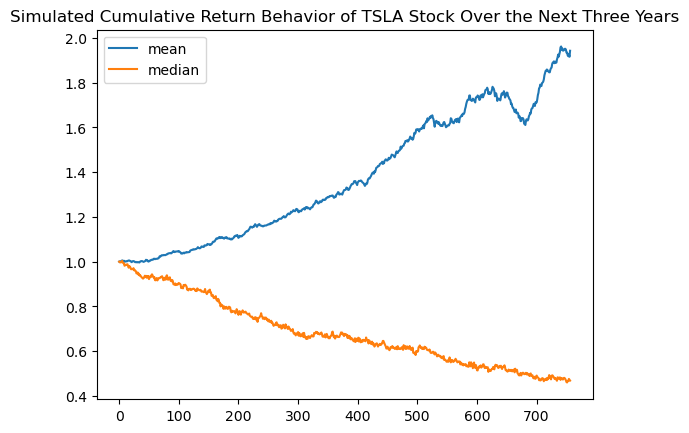

In [11]:
# Use the `plot` function to visually analyze TSLA cumulative returns over the next three hears
# (Plot both mean and median forecasted cumulative return)
df_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of TSLA Stock Over the Next Three Years")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next Three Years

In [12]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,9978.231054,9970.201538,8153.892673,11753.353072
2,10006.065034,9983.146224,7169.835756,12461.962528
3,10023.789364,9965.648174,6989.457560,13598.826840
4,10023.481298,9997.153292,6658.005499,14547.934152


### Plot the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next `252` Trading Days

<AxesSubplot:title={'center':'Simulated Outcomes Behavior of TSLA Stock Over the Next Year'}>

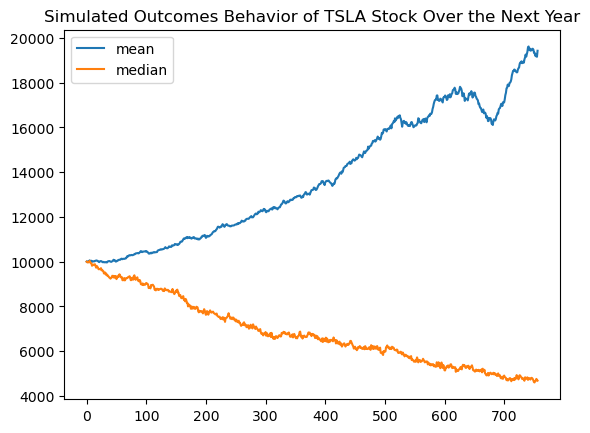

In [13]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl[['mean','median']].plot(title="Simulated Outcomes Behavior of TSLA Stock Over the Next Year")

### Calculate the range of the possible outcomes of our $10,000 investments in `TSLA` stocks

In [14]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
tbl = MC_TSLA.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               1.942864
std                6.802537
min                0.002744
25%                0.149501
50%                0.468080
75%                1.460427
max              128.422943
95% CI Lower       0.021654
95% CI Upper      10.951003
Name: 756, dtype: float64


In [16]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $216.54 and $109510.03.
